In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
liczba_dni = 365
V = 1 / liczba_dni
ilosc_losowan = 1000000
dolac = []
przelac = []
wyn = np.arange(liczba_dni)

statystyki = np.loadtxt('us_births_69_88.csv', skiprows=1, delimiter=',', dtype=int)
tablica_urodzin = statystyki[:, 2]
suma_urodzin = sum(tablica_urodzin)
pi = np.array(list(tablica_urodzin[i] / suma_urodzin for i in range(liczba_dni)))

In [3]:
def sprawdzenie(ind):
    if (pi[ind] < V):
        dolac.append(ind)
    else:
        przelac.append(ind)

In [4]:
def kubelki():
    for i in range(liczba_dni):
        sprawdzenie(i)
    while (len(dolac) > 0 and len(przelac) > 0):
        ind1 = dolac.pop()
        ind2 = przelac.pop()
        wyn[ind1] = ind2
        pi[ind2] = pi[ind2] - (V - pi[ind1])
        sprawdzenie(ind2)

In [5]:
kubelki()
wylosowane_numery = np.random.randint(0, liczba_dni, ilosc_losowan)
losowe_prawd = np.random.uniform(0, V, ilosc_losowan)
tab = losowe_prawd < pi[wylosowane_numery]
pom = np.take(wyn, wylosowane_numery)
daty = np.where(tab, wylosowane_numery, pom)

In [6]:
def fun(daty):
    rezultat = []
    dot_wartosci = set()
    for nowa_data in daty:
        if nowa_data in dot_wartosci:
            rezultat.append(len(dot_wartosci))
            dot_wartosci = set()
        else:
            dot_wartosci.add(nowa_data)
    return rezultat

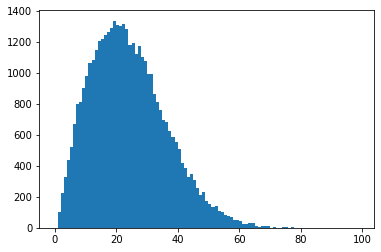

In [7]:
plt.hist(fun(daty), bins = np.arange(0,100,1))
plt.show()